In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression 


## Analysis on Data 

In [3]:
data = pd.read_csv (r'D:\Test\Data Science Job Salary\ds_salaries.csv')

In [4]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Clean Data

In [8]:
data = data.drop('Unnamed: 0' ,axis = 1)

In [9]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [10]:
# Drop this Columns to Predict & work on USD Currency 
data = data.drop(['salary' ,'salary_currency' ] , axis = 1)

In [11]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [12]:
data.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


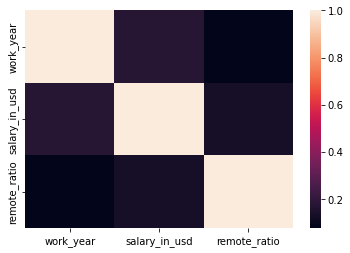

In [13]:
sns.heatmap(data.corr()); # Correlation between Numeric Data 

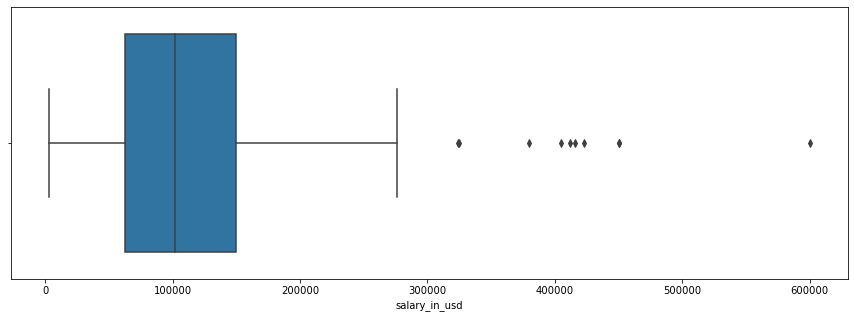

In [14]:
plt.figure(figsize = (15,5))
sns.boxplot(data =data , x = 'salary_in_usd');# We have a huge outliers 

In [15]:
data.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

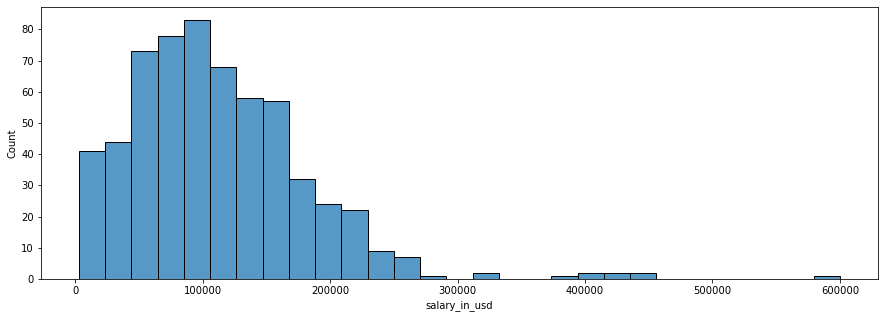

In [16]:
plt.figure(figsize = (15,5))
sns.histplot(data =data , x = 'salary_in_usd');# We have a huge outliers 

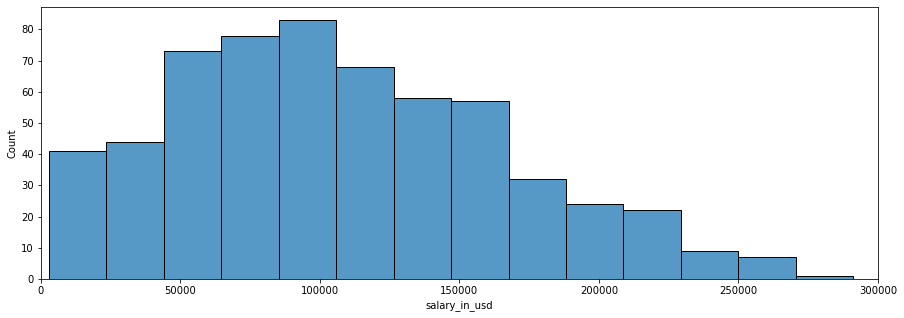

In [17]:
plt.figure(figsize = (15,5))
plt.xlim(0, 300000) # Changing Default of x range 
sns.histplot(data =data , x = 'salary_in_usd');# We have a huge outliers 

In [18]:
# drop Outliers 
data = data[data['salary_in_usd'] < 230000]

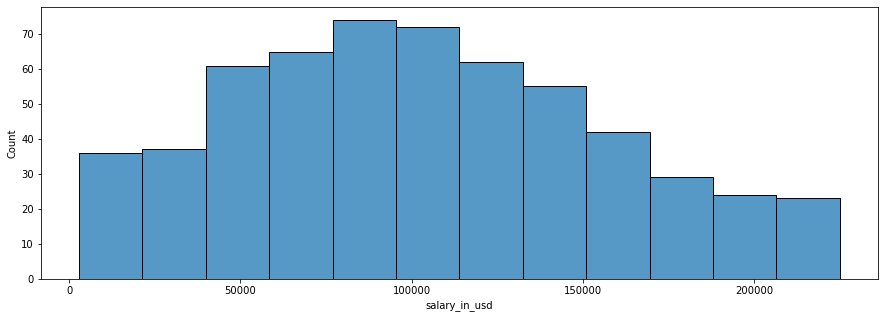

In [19]:
plt.figure(figsize = (15,5))
sns.histplot(data =data , x = 'salary_in_usd');# We have a huge outliers 

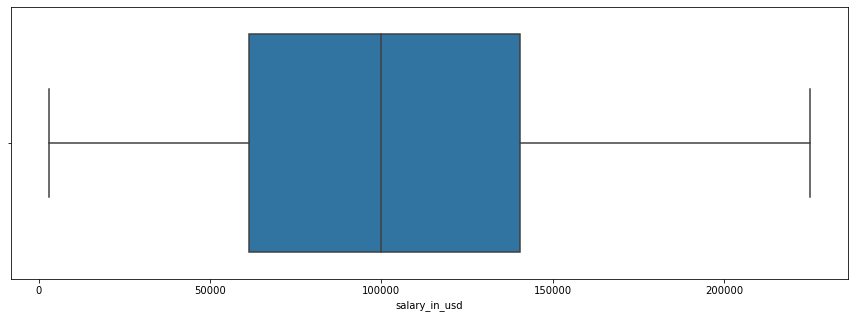

In [20]:
plt.figure(figsize = (15,5))
sns.boxplot(data =data , x = 'salary_in_usd');# We have a huge outliers 

In [21]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,US,100,US,L


## Plotting 

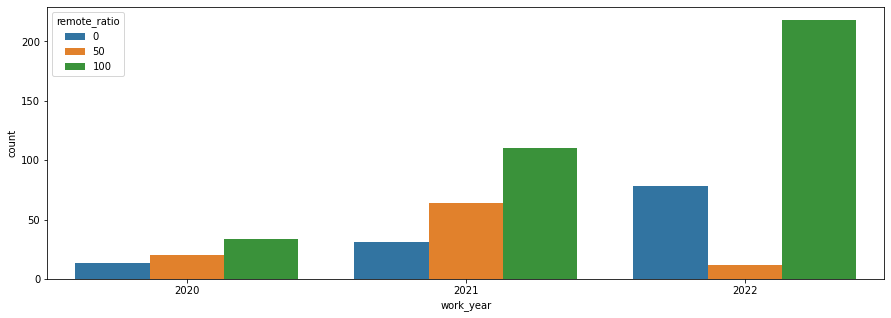

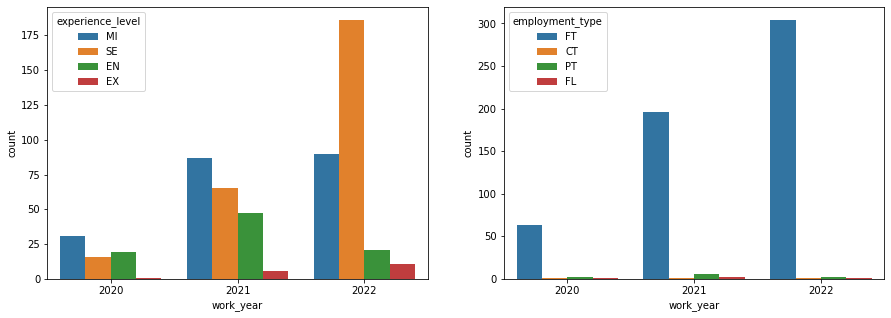

In [22]:
# EN Entry-level                                           # PT Part-time 
# MI Junior Mid-level                                      # FT Full-time 
# SE Senior-level                                          # CT Contract 
# Expert EX Executive-level                                # FL Freelance

# 0 No remote work
#50 Partially remote 
#100 Fully remote 

plt.figure(figsize=(15,5))
sns.countplot(data = data , x ='work_year' , hue = 'remote_ratio');

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = data , x ='work_year' , hue = 'experience_level')
plt.subplot(1,2,2)
sns.countplot(data = data , x ='work_year' , hue = 'employment_type');

#                                What We Understand 

# Every Year Working from home is Increase 
# Most Companies hire Full Time Job 
# 2022 is the highest year of paid specific in Senior Level 

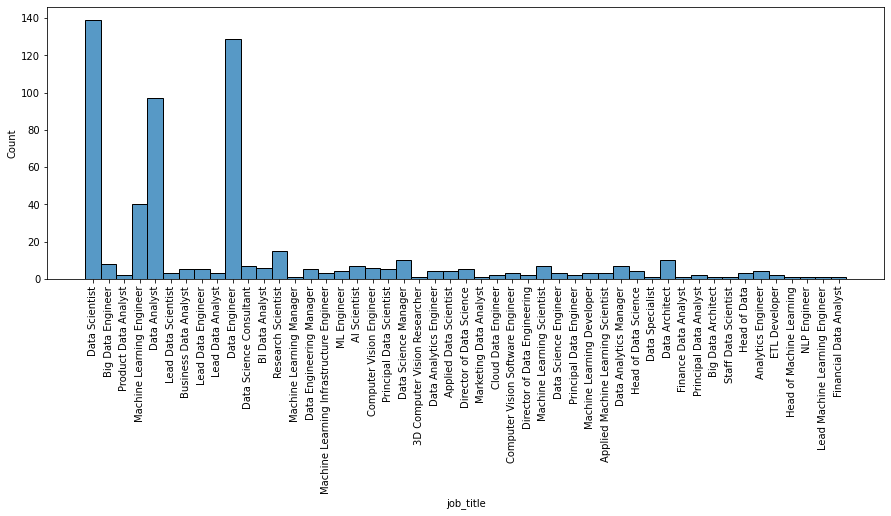

In [23]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90); # Rotate The Names in 90 Degree 
sns.histplot(data =data , x = 'job_title' );

#                                What We Understand 
# Most Jobs Companies Hire People as (Data Scientist,ML Engineer,Data Analyst,Data Engineer) 

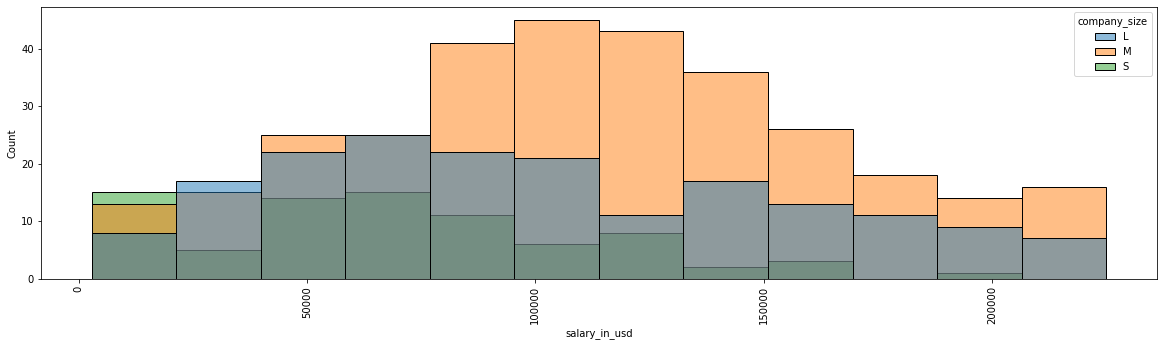

In [54]:
plt.figure(figsize=(20,5))
plt.xticks(rotation = 90); # Rotate The Names in 90 Degree 
sns.histplot(data = data , x ='salary_in_usd' , hue = 'company_size' );

# Average Salary are High in Mewdium Size 

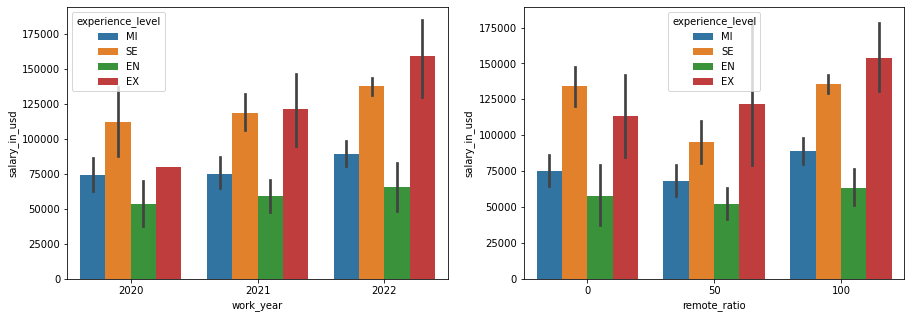

In [58]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
sns.barplot(data = data , x ='work_year' ,y = 'salary_in_usd' , hue = 'experience_level')
plt.subplot(1,2,2)
sns.barplot(data = data , x ='remote_ratio' ,y = 'salary_in_usd' , hue = 'experience_level');

##  Normalization & Encoding 

In [73]:
data.head()

,salary_in_usd,work_year_2020,work_year_2021,work_year_2022,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,79833,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,109024,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,20000,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,150000,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
5,72000,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [68]:
# One Hot Encoding for Categorical Data 
data = pd.get_dummies(data,columns=['work_year','experience_level','employment_type','job_title','employee_residence' ,'remote_ratio' ,'company_location' , 'company_size' ])

In [75]:
# Normalization for Numerical Data 
scaler = MinMaxScaler()
data[['salary_in_usd' ]] = scaler.fit_transform(data[['salary_in_usd' ]])

## Divde Data into Training & Testing 

In [76]:
x = data.drop('salary_in_usd' , axis = 1) 
y = data['salary_in_usd']
print(x.shape)
print(y.shape)


(580, 173)
(580,)


In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Using Machine Learning  (Linear Regression)

In [80]:
model = LinearRegression()

In [81]:
model.fit(x_train,y_train)

LinearRegression()

In [83]:
model.score(x_train,y_train)

0.7627243305209543